# CONVOLUTIONAL NEURAL NETWORKS

Welcome to the convolutional neural networks lecture. CNN's are the spine behind the world's view of SMART technology, technology that can recognize people and things just by looking at them like a human being. 

We already have a thorough understanding of artificial neural networks, we will introduce a little more theory before we dive into the fun coding stuff. 


## ESTIMATORS REVISION
Let's go over the steps of using Estimators one by one (yet again):
#### PREPROCESSING
1. Clean the data
2. Create normalized columns.
3. Fix Missing records.
4. Split into train and test sets.

#### CREATE FEATURE COLUMNS
- Create a feature column for every column using tf.feature_column.
- Make a list of all columns created.

#### CREATING THE ESTIMATOR OBJECT / MODEL
1. Use tf.estimator to create an estimator object.
2. Pass the feature columns list and the number of classes to it.

#### CREATE INPUT, TEST AND PREDICTION FUNCTIONS.
1. INPUT
    - Input X_train and y_train.
    - Use tf.estimator.inputs
    - Will go through model.train
2. TEST
    - Input X_test and y_test.
    - Use tf.estimator.inputs
    - Will go through model.evaluate
3. PREDICTION
    - Input X_test.
    - Use tf.estimator.inputs
    - Will go through model.predict
    
## LET'S GET ACQUAINTED WITH THE PROBLEMS OF ANNs

#### INITIALIZATION OF WEIGHTS:
1. Zeros (No Randomness, hence faulty)
2. Random distribution (Can distort our distributions)


#### LEARNING RATE
It can be too large or too small for the model to work. 

#### GRADIENT DESCENT
If we feed too much information into the neural network, not only will it be harder for it to learn but a lot of outliers will create their own set of "information points" for the NN to learn. 

Hence we use Stochastic Gradient Descent in which we feed batches of data. 

The smaller the batch, the less information it has.

#### ADJUSTABLE LEARNING RATES
Second Order Gradient Descent Optimization Alogorithms help us adjust the learning rates based off the rate of descent.

So the learning rate is usually large at the start of learning and then gradually decreases. 

#### VANISHING GRADIENTS
The gradients near the input layers are not adjusted as we move deeper into the learning process. 

###### SOLUTION 
1. Use Glorot initialization, sometimes referred to as the Xaviar distribution. It is an I.I.D distribution. 
    - Draw weights from a distribution with a zero mean and specific variance. 
    - Linked to the number of neurons feeding into the neuron with variable / initializable component. 
    - Variance of output equals variance of the input scaled by the number of input neurons multiplied by the variance of weights. 
    - If we want the variance of output and input to be the same, then n times the variance of weights should equal 1. 

2. Regularization 
    - Add a penalty to larger weights in the model so we do not get a neural network that only displays ONE feature. 
    
3. Dropout 
    - Remove neurons during training.
    - Network will not over rely on one neuron.
4. Expand Data:
    - We make more data by adding noise, transforming images and distorting our data. 
    

## MNIST DATASET
- Tensorflow MNIST dataset has 55000 training images, 10000 test images and 5000 validation images. 
- The dataset contains handwritten images. 
- 28 by 28 pixeled images.
- Flatten to (781,1).
- Flattening removes some information. 
- The entire group is a tensor!
- We have a label array that has index positions corresponding to the categories (10 in our case for each digit).


## NOOB APPROACH - SOFTMAX REGRESSION
- The activation function is a softmax function.
- Softmax function gives numbers between 0 to 1 that add up to 1 for all classes. 


In [18]:
import tensorflow as tf
print(tf.__version__)

1.8.0


In [19]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [20]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [21]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [22]:
mnist.train.num_examples

55000

(784,)


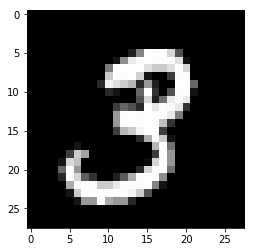

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline
print(mnist.train.images[1].shape)
single =mnist.train.images[1].reshape(28,28)
plt.imshow(single, cmap = 'gist_gray')

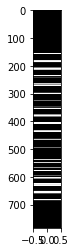

In [24]:
plt.imshow(mnist.train.images[1].reshape(784,1),cmap='gist_gray',aspect=0.01)

## ANN REVISION
Let's revise the steps of ANN one by one:
#### BUILDING A GRAPH
- We will create some nodes and edges.
- We will apply a mathematical operation in those nodes. 
- The graph will have variables for model parameters. 
- The graph will have placeholders for inputs.
- Every node will have a few inputs and an output. 


#### INITIATING A SESSION
- Create a session in OUR graph.


#### FEEDING INPUTS
- Input the data into the placeholders.
- Run the graph in our session.


#### GETTING OUTPUTS
- Running the graph in a session will provide the results in the proper format.

In [25]:
x = tf.placeholder(tf.float32,shape=[None,784])
W = tf.Variable(tf.zeros([784,10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x,W) + b 
y_true = tf.placeholder(tf.float32,[None,10])

# NONE IS THE BATCH SIZE
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true, logits=y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)


In [26]:
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})

#EVALUATION        
    correct = tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    accuracy = tf.reduce_mean(tf.cast(correct,tf.float32))
    
    print(sess.run(accuracy,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))
    

0.9176


## CNN's
Yann LeCun implemented the very first CNN in his 1988 paper.

### TENSORS
- N dimensional arrays
- Scalars to Vectors to Matrices to Tensors 
- Tensors are convenient for feeding the images due to their N dimensional structure.
- Our images will be in the form of ( Height, Width, ColorChannel ). 
- The ID or Number of image will be included in the tensor in the following form:
    - ID, Height, Width, ColorChannel
    - 3, 28, 28, 2
    - The above tensor shows the third image of the MNIST dataset.
    - The above tensor shows that the height and width of image are 28 by 28.
    - The above tensor shows the values for the BLUE color channel (as it is RGB). 

### CNN VS ANN VS DNN
- ANNs govern the basic structure of all neural networks.
- DNNs are fully connected. Every neuron in one layer is connected to every neuron in the next layer. 
- CNNs have a less dense structure.
- Convolutions show correlations directly related to and scaled by the nearby pixels. 
- So the deeper a CNN layer, the bigger image portion we are looking at. 
- Gives us an invariant and regularized model.
- Convolution neurons can be visualized as lenses looking at a particular portion of the images!.
- The weights act like filters. For example, if weights are initialized as 1 and -1, the output equation will be y = x1 - x2. 
- This equation is maximum when either one of these inputs is 1 and the other is 0. Hence 1 refers to a HIGH pixel intensity and 0 refers to a LOW pixel intensity. WE HAVE BASICALLY DESCRIBED AN EDGE DETECTOR. 
- We add Padding of zeros for image edges where we have no pixels.
- Each filter detects a different feature.
#### FILTER TERMS TO KNOW
- Filter numbers - how many different sets of weights (and equations) do you have.
- Filter size - how many weights per layer are initialized ( directly related to the number of neurons being input to the next layer)
- Stride - how many neurons do you want to jump up!

### THE STEPS TO CNN
For us to understand CNN's we must understand how a human brain classifies images. Take the rabbit-or-duck image for example:

<img src='dr.jpg' width = 500>

What do you see? A rabbit or a duck? This is one of the oldest optical illusions known to man. Each time you look at this image, your brain tries to extract features from it. To delve a bit deeper, if your brain finds more features calling this image a duck, you will percieve it is a duck. 

#### 1- CONVOLUTION OPERATION
Convolution refers to the element wise multiplication of a kernel with the input image and adding them up. If it doesn't make sense, look at the figure below:
<img src='c.jpg' width=500>

Here, the image (left most block) convolved with the feature detector (or feature extractor / middle block) gives the convolved feature map (right most block).

1. The stride decides how small the feature map is. 
2. The main purpose of convolution is to extract features from the image and discard the useless bits.
3. We create multiple feature maps by using multiple detectors/ extractors.

The following link does an amazing job at explaining convolution
[https://docs.gimp.org/en/plug-in-convmatrix.html]

An additional thing that happens during the first step is Rectification. This makes our feature map non-linear. Why do we want non-linearity in our features? because feature detection causes the non linear nature of our images to be compromised. So it creates a sharper bit differences. 

So what will be the dimensions for Convolution Layer Tensors? 
The convolution layer tensors will have the following structure for each image of ( Height, Width ) :

    - ( Filters, Units_for_Height, Units_for_Width )
For an image of multiple color channels (as is the case with RGB images) we will have input images of form ( Height, Width, ColorChannels) and the Convolution Layers will be:
    
    - ( Filters, Units_for_Height, Units_for_Width )
    
#### 2- PADDING
- Surrounding our images by zeros so as to provide inputs for convolution layers / filters. 


#### 3- POOLING
We want the neural network to recognize objects even when they are observed from different perspectives. For that to happen, we must POOL the feature map. We must introduce spacial invariance in the feature map. 

We have different types of pooling operations:
1. Max Pooling
2. Mean Pooling or Average Pooling.

In Max pooling, a feature detector like block is generated that takes the maximum of the feature map and outputs it.

Pooling helps us:
1. Reduce the size of the map.
2. Remove unnecessary information. 
3. Preventing overfitting. 


#### 4- FLATTENING
Now that we have the pooled feature map, we want to flatten it into an input vector which will be the input layer of our ANN.


#### 5- FULL CONNECTION
Now that we have our input vector, we will create a fully connected ANN and input the vector into the input layer. 
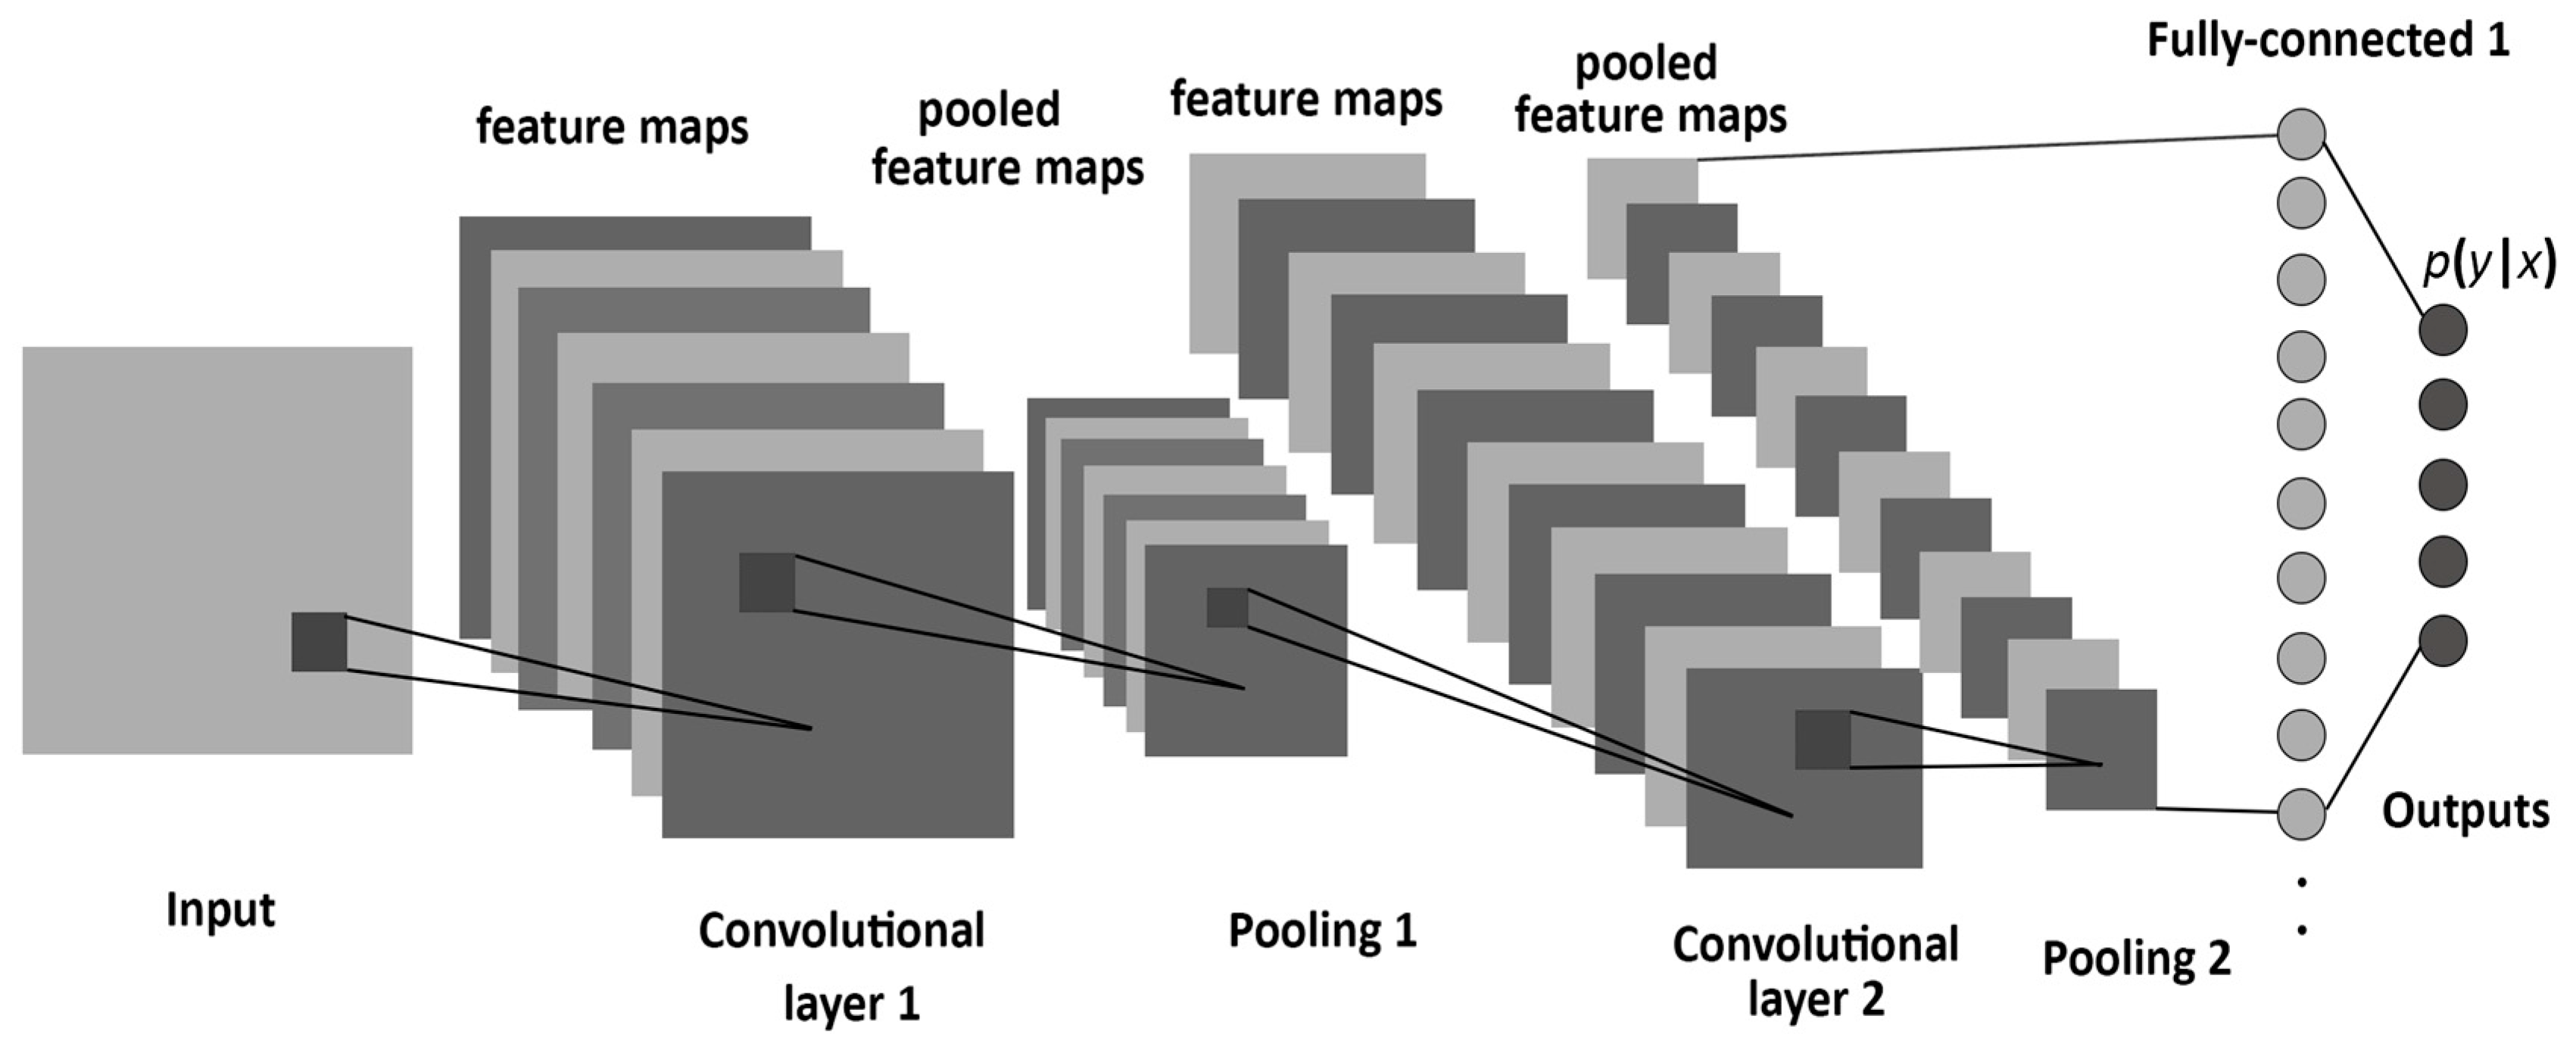
Image taken from: [http://www.mdpi.com/1099-4300/19/6/242]

## ALEXNET EXAMPLE (OPTIONAL MATHS)
[Source https://www.learnopencv.com/number-of-parameters-and-tensor-sizes-in-convolutional-neural-network/]

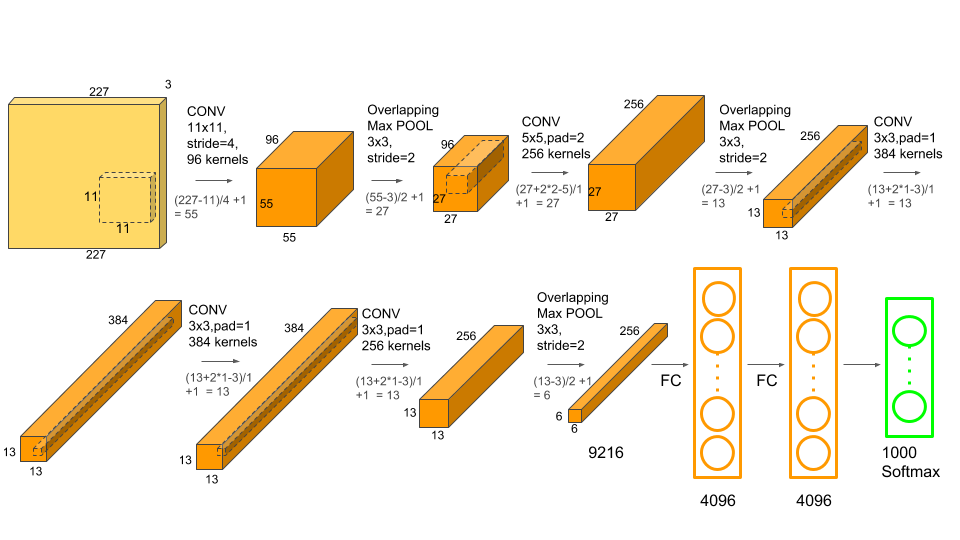

AlexNet has the following layers

- Input: Color images of size 227x227x3. 
- Conv-1: The first convolutional layer consists of 96 kernels of size 11×11 applied with a stride of 4 and padding of 0.
- MaxPool-1: The maxpool layer following Conv-1 consists of pooling size of 3×3 and stride 2.
- Conv-2: The second conv layer consists of 256 kernels of size 5×5 applied with a stride of 1 and padding of 2.
- MaxPool-2: The maxpool layer following Conv-2 consists of pooling size of 3×3 and a stride of 2.
- Conv-3: The third conv layer consists of 384 kernels of size 3×3 applied with a stride of 1 and padding of 1.
- Conv-4: The fourth conv layer has the same structure as the third conv layer. It consists of 384 kernels of size 3×3 applied with a stride of 1 and padding of 1.
- Conv-5: The fifth conv layer consists of 256 kernels of size 3×3 applied with a stride of 1 and padding of 1.
- MaxPool-3: The maxpool layer following Conv-5 consists of pooling size of 3×3 and a stride of 2.
- FC-1: The first fully connected layer has 4096 neurons.
- FC-2: The second fully connected layer has 4096 neurons.
- FC-3: The third fully connected layer has 1000 neurons.

### CALCULATIONS OF TENSORS AT EACH STAGE
For Convolution Layers, Let’s define

O = Size (width) of output image.
I = Size (width) of input image.
K = Size (width) of kernels used in the Conv Layer.
N = Number of kernels.
S = Stride of the convolution operation.
P = Padding.

The size (O) of the output image is given by

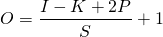

The number of channels in the output image is equal to the number of kernels N.

In AlexNet, the input image is of size 227x227x3. The first convolutional layer has 96 kernels of size 11x11x3. The stride is 4 and padding is 0. Therefore the size of the output image right after the first bank of convolutional layers is 55.
So, the output image is of size 55x55x96 ( one channel for each kernel ).


For MAXPOOL Layers, Let’s define

O = Size (width) of output image.
I = Size (width) of input image.
S = Stride of the convolution operation.
P_s = Pool size.

The size (O) of the output image is given by:
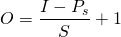

In AlexNet, the MaxPool layer after the bank of convolution filters has a pool size of 3 and stride of 2. We know from the previous section, the image at this stage is of size 55x55x96. The output image after the MaxPool layer is of size 27. So, the output image is of size 27x27x96.

## CODE FOR CNNs


In [27]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [28]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.2, shape=shape)
    return tf.Variable(init_bias_vals)

In [29]:
def init_weights(shape):
    init_random_dist = tf.random_normal(shape, stddev=0.2)
    return tf.Variable(init_random_dist)

In [30]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

# x >> [BATCH, HEIGHT, WIDTH, CHANNELS]
# W >> [FILTER HEIGHT, FILTER WIDTH, INPUT CHANNELS, OUTPUT CHANNELS (KERNELS)]

### CONVOLUTION 2D :
1. Create 2D Filters of shapes:
    - ( FILTER HEIGHT * FILTER WIDTH * INPUT CHANNELS , OUTPUT CHANNELS )
2. Transforms input images to:
    - ( BATCH, OUTPUT HEIGHT, OUTPUT WIDTH, FILTER HEIGHT * FILTER WIDTH * IN CHANNELS ) 
3. Multiplication of FILTER with TRANSFORMED IMAGE.

In [31]:
def maxpool(convlayer):
    return tf.nn.max_pool(convlayer, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

In [32]:
def convolutional_layer(inputx, shape):
    # filter_height, filter_width, input_channels, number_of_filters
    W = init_weights(shape) 
    b = init_bias([shape[3]])#ONE BIAS FOR EACH FILTER
    return tf.nn.relu(conv2d(inputx, W) + b)

In [33]:
def fclayer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W) + b

In [34]:
x = tf.placeholder(tf.float32,shape=[None,784])#none for batch
y_true = tf.placeholder(tf.float32,shape=[None,10])
x_image = tf.reshape(x,[-1,28,28,1])

In [35]:
filter_height = 6
filter_width = 6
input_channels = 1
number_of_filters = 32
conv1 = convolutional_layer(x_image,shape=[filter_height,
                                             filter_width,
                                             input_channels,
                                             number_of_filters])
conv1pooling = maxpool(conv1)

In [36]:
filter_height = 6
filter_width = 6
input_channels = 32
number_of_filters = 64
conv2 = convolutional_layer(conv1pooling,shape=[filter_height,
                                             filter_width,
                                             input_channels,
                                             number_of_filters])
conv2pooling = maxpool(conv2)

In [37]:
# 7 x 7 image because 2 pooling layers give (28/2)/2 = 7
conv2flat = tf.reshape(conv2pooling,[-1,7*7*64])
number_of_neurons = 500
fclayerone = tf.nn.relu(fclayer(conv2flat,number_of_neurons))

In [38]:
# DROPOUT
hold_prob = tf.placeholder(tf.float32)
fconedropout = tf.nn.dropout(fclayerone,keep_prob=hold_prob)
y_pred = fclayer(fconedropout,10)

In [39]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))
optimizer = tf.train.AdamOptimizer(learning_rate=0.01)
train = optimizer.minimize(cross_entropy)
init = tf.global_variables_initializer()

In [40]:
steps = 5000

with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(steps):
        
        batch_x , batch_y = mnist.train.next_batch(100)
        
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
        
        # PRINT OUT A MESSAGE EVERY 100 STEPS
        if i%100 == 0:
            
            print('Step {}'.format(i))
            print('Accuracy:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,1),tf.argmax(y_true,1))

            acc = tf.reduce_mean(tf.cast(matches,tf.float32))

            print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels,hold_prob:1.0}))

Step 0
Accuracy:
0.1009
Step 100
Accuracy:
0.7526
Step 200
Accuracy:
0.8657
Step 300
Accuracy:
0.9217
Step 400
Accuracy:
0.94
Step 500
Accuracy:
0.9461
Step 600
Accuracy:
0.9576
Step 700
Accuracy:
0.9591
Step 800
Accuracy:
0.9662
Step 900
Accuracy:
0.9624
Step 1000
Accuracy:
0.967
Step 1100
Accuracy:
0.9718
Step 1200
Accuracy:
0.9715
Step 1300
Accuracy:
0.9661
Step 1400
Accuracy:
0.9682
Step 1500
Accuracy:
0.9716
Step 1600
Accuracy:
0.9719
Step 1700
Accuracy:
0.9701
Step 1800
Accuracy:
0.9705
Step 1900
Accuracy:
0.9737
Step 2000
Accuracy:
0.9703
Step 2100
Accuracy:
0.9704
Step 2200
Accuracy:
0.9724
Step 2300
Accuracy:
0.9701
Step 2400
Accuracy:
0.978
Step 2500
Accuracy:
0.974
Step 2600
Accuracy:
0.9758
Step 2700
Accuracy:
0.9769
Step 2800
Accuracy:
0.977
Step 2900
Accuracy:
0.9759
Step 3000
Accuracy:
0.9694
Step 3100
Accuracy:
0.9783
Step 3200
Accuracy:
0.974
Step 3300
Accuracy:
0.9754
Step 3400
Accuracy:
0.979
Step 3500
Accuracy:
0.9768
Step 3600
Accuracy:
0.9803
Step 3700
Accuracy:
0

### WELCOME TO THE END OF THE TUTORIAL
Hope you enjoyed it. Till next time folks !

---------------------------------------------------------------------------------------
Copyrights © 2018, All Rights Reserved.
- Author: Mahnoor Anjum.
- Course: The Complete Hands-On Machine Learning Course
- Date Created: 2018-08-02
- Date Modified: -